<img src='data/images/lecture-notebook-header.png' />

## Project Team 12

<pre>
Kelvin Soh Boon Kai, Lee Fuk Sing, Lim Gen Liang, Putri Darmawan
School of Computing
National University of Singapore
Singapore
{ e1124460, fs.lee, limgenliang, putridarmawan }@u.nus.edu    
</pre>

Date: Feb 20, 2024

This text mining project aims to build a reliable system distinguishing human-generated text from Language Model Models (LLMs), particularly OpenAI's GPT-like models. Focused on natural language processing and AI ethics, our objective is to create a machine learning model addressing concerns about misattributed AI-generated content in various areas.

---

## Task 1 - Exploratory Data Analysis

To be developed..

Simple analysis of the data and have a general idea of data distribution, statistics.

1. File read
   - Local file read
3. Text processing
   - Tokenization: Sentences (PunktSentenceTokenizer)
   - Tokenization: Tokens (TreebankWordTokenizer)
   - Stemming (skipped)
   - Part-of-Speech (POS) Tagging
4. Statistics
   - Text size
   - Sentence count
   - Word count
6. Visualization
   - Wordcloud (with no stop words)
   - Statistics

<div align=center>
    <img src='data/images/ie-architecture.png' width=500/>
    <div>Figure 1: Simple Pipeline Architecture for an Information Extraction System. This system takes the raw text of a document as its input, and generates a list of (entity, relation, entity) tuples as its output. Source: https://www.nltk.org/book/ch07.html</div>
</div>


---

Exploratory Data Analysis (EDA) is a crucial step in understanding and preparing your dataset for further analysis. Here are some EDA tasks you can perform with your BBC news articles dataset on politics:

1. Data Loading and Inspection:
- Load the dataset into your preferred analysis environment (e.g., Python with pandas).
- Check the structure of the dataset (number of rows and columns).
- View a sample of the data to understand its format and contents.

2. Basic Statistics:
- Compute basic statistics such as mean, median, mode, standard deviation, etc., for relevant columns like word count, article length, publication date, etc.
- Determine the distribution of articles over time (e.g., daily, monthly, yearly).

3. Text Preprocessing:
- Tokenize the text into words or phrases.
- Remove stop words (commonly occurring words that typically do not contribute much to the meaning of the text).
- Perform stemming or lemmatization to reduce words to their root forms.

4. Word Frequency Analysis:

- Identify the most frequent words in the dataset.
- Explore the distribution of word frequencies.
- Visualize word frequencies using techniques like word clouds or bar plots.

5. Topic Modeling:

- Apply topic modeling techniques (e.g., Latent Dirichlet Allocation, Non-negative Matrix Factorization) to discover latent topics within the articles.
- Visualize the results of topic modeling to understand the prevalent themes in the dataset.

6. Sentiment Analysis:

- Analyze the sentiment of articles to understand the overall tone (positive, negative, neutral).
- Visualize sentiment trends over time.

7. Named Entity Recognition (NER):

- Use NER techniques to identify and extract entities such as people, organizations, and locations mentioned in the articles.
- Analyze the frequency and distribution of named entities.

8. Document Similarity Analysis:

- Compute similarities between articles based on their content (e.g., using cosine similarity).
- Cluster similar articles together to identify groups of related news stories.

9. Visualization:

- Visualize the distribution of articles by different categories (e.g., publication source, political party mentioned, geographical location).
- Create word clouds, histograms, scatter plots, etc., to illustrate key insights.

10. Language and Text Complexity:

- Analyze the complexity of language used in the articles (e.g., readability scores).
- Explore the variation in text complexity across different publishers or authors.

11. Named Entity Co-occurrence Analysis:

- Analyze the co-occurrence patterns of named entities within articles to uncover relationships between different entities.

12. Exploring Relationships:

- Investigate relationships between different variables such as article length and publication date, sentiment and topic, etc.
- Use correlation analysis or visualization techniques like scatter plots to identify potential associations.

---

## Setting up the Notebook

### Project settings

In [1]:
proj = {
    'input_folder': r'data\datasets\bbc\politics',
    'lib': 'spacy',  # 'nltk' or 'spacy', preferred library for tasks like tokenization and pos tagging
}

feat_list = {
    'path',
    'name',
    'text',
    'length',
    'sentences'
    'tokens',
    'pos_tags',
    'count_sentences',
    'count_tokens',
}

feat = {}
for f in feat_list:
    feat[f] = f

### Import all Required Packages

We use NLTK a spaCy, two very popular and mature Python packages for language processing.


In [2]:
import glob
import os

from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import TreebankWordTokenizer
# from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import RegexpTokenizer

from nltk import word_tokenize  # Simplfied notation; it's a wrapper for the TreebankWordTokenizer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from nltk.help import upenn_tagset
from nltk import pos_tag

import spacy
# Load English language model
nlp = spacy.load('en_core_web_sm')

from tqdm import tqdm
from src.plotutil import show_wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Terence\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK provides more tokenizers: http://www.nltk.org/api/nltk.tokenize.html

### BBC News Dataset

http://mlg.ucd.ie/datasets/bbc.html 


The dataset is a collection of news articles from the BBC, categorized into various topics, including business, entertainment, politics, sport, and tech. The data consists of 2225 documents collected from the BBC news website of various topics, from 2004 to 2005. The topics are business, entertainment, politics, sports and tech. Each document is stored as a text file. For this project, we would like to focus on the politics documents. The aim is to allow the model to correctly classify the news data in several few topics before generalizing to other topics. t.

In [3]:
docs = []
paths = glob.glob(os.path.join(proj['input_folder'], '*'))
for path in tqdm(paths):
    if os.path.isfile(path):
        with open(path, 'r') as file:
            text = file.read()
            docs.append({
                'path': path,
                'name': os.path.basename(path),
                'text': text,
                'length': len(text),
            })

print("document 0: {0} characters".format(docs[0]['length']))

print("Number of files from the dataset:", len(docs))
print(docs[0]['name'])

100%|██████████████████████████████████████████████████████████████████████████████| 417/417 [00:00<00:00, 6956.28it/s]

document 0: 2601 characters
Number of files from the dataset: 417
001.txt


### Target features of the dataset:

for each doc from the list of documents
1. path: location of the text file
2. text: loaded text from the file
3. length: number of characters
4. sentences: the list of sentences, and count_sentences: number of sentences
5. tokens: the list of tokens, and count_tokens: number of tokens
6. pos_tags: Part of Speech (POS) tags
7. 

## Tokenization with NLTK

### Document tokenization into sentences

Split the documents into sentences and not individual tokens.

In [4]:
sentence_tokenizer = PunktSentenceTokenizer()

for doc in docs:
    doc['sentences'] = sentence_tokenizer.tokenize(doc['text'])
    doc['count_sentences'] = len(doc['sentences'])
    # print(doc['count_sentences'])

In [5]:
# sample output only
#
# The first document in a list of sentences
#
for i, doc in enumerate(docs):
    # print(doc)
    print("document {0}: {1} sentences".format(i, doc['count_sentences']))
    for s in doc['sentences']:
        # print('> ', s)
        break
    break

document 0: 19 sentences


### Document tokenization into tokens

In the following, we tokenize each sentence individually. This makes the presentation a bit more convenient. In practice, you can tokenize the whole document at once.

In [6]:
print ('\nOutput of split() method:')
for s in docs[0]['sentences']:
    break
    print (s.split(' '))
    #print(s.split()) # This is also fine since whitespace is the default separator


Output of split() method:


The limitation of this approach is obvious, since many tokens are not separated by a whitespace. Most commonly this is the case for punctuation marks.

#### TreebankWordTokenizer

The `TreebankWordTokenizer` is a tokenizer available in the Natural Language Toolkit (NLTK) library for Python. It is specifically designed to tokenize text according to the conventions of the Penn Treebank. The Penn Treebank is a widely used corpus of annotated English text that has been extensively used in natural language processing research.

The `TreebankWordTokenizer` tokenizes text by following the rules and conventions defined in the Penn Treebank. It splits text into words and punctuation marks while considering specific cases such as contractions, hyphenated words, and punctuation attached to words. It is the default tokenizer of NLTK. This tokenizer is commonly used for tasks that rely on the Penn Treebank tokenization conventions, such as training and evaluating language models, part-of-speech tagging, syntactic parsing, and other NLP tasks that benefit from consistent tokenization based on the Penn Treebank guidelines.

In [7]:
treebank_tokenizer = TreebankWordTokenizer()

print ('\nOutput of TreebankWordTokenizer:')
for s in docs[0]['sentences']:
    print (treebank_tokenizer.tokenize(s))
    break

print ('\nOutput of the word_tokenize() method:')
for s in docs[0]['sentences']:
    print (word_tokenize(s))
    break


Output of TreebankWordTokenizer:
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.']

Output of the word_tokenize() method:
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.']


In [8]:
# sample output only
#
for doc in docs:
    doc['tokens'] = []
    for s in doc['sentences']:
        doc['tokens'] += word_tokenize(s)
    doc['count_tokens'] = len(doc['tokens'])
    break

print("docs[0]: {0} tokens".format(docs[0]['count_tokens']))
print(docs[0]['tokens'][0:100])

docs[0]: 511 tokens
['Labour', 'plans', 'maternity', 'pay', 'rise', 'Maternity', 'pay', 'for', 'new', 'mothers', 'is', 'to', 'rise', 'by', 'Â£1,400', 'as', 'part', 'of', 'new', 'proposals', 'announced', 'by', 'the', 'Trade', 'and', 'Industry', 'Secretary', 'Patricia', 'Hewitt', '.', 'It', 'would', 'mean', 'paid', 'leave', 'would', 'be', 'increased', 'to', 'nine', 'months', 'by', '2007', ',', 'Ms', 'Hewitt', 'told', 'GMTV', "'s", 'Sunday', 'programme', '.', 'Other', 'plans', 'include', 'letting', 'maternity', 'pay', 'be', 'given', 'to', 'fathers', 'and', 'extending', 'rights', 'to', 'parents', 'of', 'older', 'children', '.', 'The', 'Tories', 'dismissed', 'the', 'maternity', 'pay', 'plan', 'as', '``', 'desperate', "''", ',', 'while', 'the', 'Liberal', 'Democrats', 'said', 'it', 'was', 'misdirected', '.', 'Ms', 'Hewitt', 'said', ':', '``', 'We', 'have', 'already']


# Part-of-Speech (POS) Tagging

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

Knowing the POS tags for words in a text is very useful or even crucial for many downstream tasks:
* Lemmatization (select correct lemma given a word and its POS tag)
* Word Disambiguation ("I saw a bear." vs "Bear with me!")
* Named Entity Recognition (typically comprised of nouns and proper nouns)
* Information Extractions (e.g., verbs indicate relations between entities)
* Parsing (information of word classes useful before creating parse trees)
* Speech synthesis/recognition (e.g., noun "DIScount" vs. verb "disCOUNT")
* Authorship Attribution (e.g., relative frequencies of nouns, verbs, adjectives, etc.)
* Machine Translation (e.g., reordering of adjectives and nouns)

In [9]:
upenn_tagset()  # from nltk

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## POS Tagging with NLTK

### Definition of Tokenizer

For any kind of more formal text, the default tokenizer will work just fine. Even here, the default tokenizer would suffice since the important token (i.e., the "real" words) are handled correctly.

In [10]:
if proj['lib'] == 'nltk':    
    print ('\nOutput of NLTK POS tagger:')
    for doc in tqdm(docs):
        doc['tokens'] = []
        doc['pos_tags'] = []
        for sentence in doc['sentences']:
            tokens = word_tokenize(sentence)
            pos_tags = pos_tag(tokens)  # pos_tag from nltk
            doc['tokens'] += tokens 
            doc['pos_tags'] += pos_tags
        doc['count_tokens'] = len(doc['tokens'])
        # print('.', end='', flush=True)
    print(docs[0]['pos_tags'][0:100])  # first k = 100 tags

## POS Tagging with spaCy (slower)

Similar to lemmatization, spaCy performs POS tagging by default. This means that any time you analyze a document -- and do not explicitly turn off the POS tagger -- spaCy will assign each token its corresponding POS tag. This makes POS tagging very easy and quick in terms of the required code. Let's use spaCy to perform POS tagging on our example document below. The code below ensures that the output is similar in structure compared to the one from NLTK to allow for an easy comparison.


In [11]:
if proj['lib'] == 'spacy':
    print ('\nOutput of spaCy POS tagger:')
    for doc in tqdm(docs):
        doc['tokens'] = []
        doc['pos_tags'] = []
        for sentence in doc['sentences']:
            tokens = nlp(sentence)  # tokens is an object, not just a simple list
            for token in tokens:
                doc['tokens'].append(token.text)
                doc['pos_tags'].append((token.text, token.tag_))  # token is also an object, not a string
            # break
        # break
        doc['count_tokens'] = len(doc['tokens'])
    print(docs[0]['pos_tags'][0:100])  # first k = 100 tags


Output of spaCy POS tagger:


100%|████████████████████████████████████████████████████████████████████████████████| 417/417 [01:49<00:00,  3.81it/s]

[('Labour', 'NN'), ('plans', 'VBZ'), ('maternity', 'NN'), ('pay', 'NN'), ('rise', 'NN'), ('\n\n', '_SP'), ('Maternity', 'NN'), ('pay', 'NN'), ('for', 'IN'), ('new', 'JJ'), ('mothers', 'NNS'), ('is', 'VBZ'), ('to', 'TO'), ('rise', 'VB'), ('by', 'IN'), ('Â£1,400', 'NNP'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('new', 'JJ'), ('proposals', 'NNS'), ('announced', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Trade', 'NNP'), ('and', 'CC'), ('Industry', 'NNP'), ('Secretary', 'NNP'), ('Patricia', 'NNP'), ('Hewitt', 'NNP'), ('.', '.'), ('It', 'PRP'), ('would', 'MD'), ('mean', 'VB'), ('paid', 'VBN'), ('leave', 'NN'), ('would', 'MD'), ('be', 'VB'), ('increased', 'VBN'), ('to', 'IN'), ('nine', 'CD'), ('months', 'NNS'), ('by', 'IN'), ('2007', 'CD'), (',', ','), ('Ms', 'NNP'), ('Hewitt', 'NNP'), ('told', 'VBD'), ('GMTV', 'NNP'), ("'s", 'POS'), ('Sunday', 'NNP'), ('programme', 'NN'), ('.', '.'), ('Other', 'JJ'), ('plans', 'NNS'), ('include', 'VBP'), ('letting', 'VBG'), ('maternity', 'NN'), ('pay', 'NN'

### Word analysis

For each document, we perform the following steps:
- Tokenize sentences and POS tag all tokens.
- Check each token if it is an adjective, or a noun.
- If a token is an adjective/a noun, increase a counter for this token under the tag class
- We also count for built-in tag classes. Visualizing the popular tokens of different tag classes may provide us important details.

In [12]:
# This dictionary will keep track of the count for each type of tags
#
frequencies = {
    'adjective': {},
    'noun': {},
}

stop_words = set(stopwords.words('english'))

# Check each sentence one by one
for doc in tqdm(docs):
    sentences = doc['sentences']
    for sentence in sentences:
        # Tokenize the sentence
        token_list = word_tokenize(sentence)
        # POS tag all words/tokens
        pos_tag_list = pos_tag(token_list)
        # Count the number of all adjectives
        for token, tag in pos_tag_list:
            tag = tag.lower()
            tag_class = None
            if tag[0] == 'j':
                tag_class = 'adjective'
            elif tag[0] == 'n':
                tag_class = 'noun'
            else:
                tag_class = tag  # we want to see them all !
                
            token = token.lower()  # Convert token to lowercase, otherwise "Good" and "good" are considered differently
            if token in stop_words:
                continue
                # print(f"{token}: stop word")

            if tag_class not in frequencies:
                frequencies[tag_class] = {}

            if token not in frequencies[tag_class]:
                frequencies[tag_class][token] = 1.0
            else:
                frequencies[tag_class][token] += 1.0
    # break

100%|████████████████████████████████████████████████████████████████████████████████| 417/417 [00:19<00:00, 21.11it/s]


With `frequencies`, we now have a dictionary where the keys are the tag classes and the values represent how often they occured in all sentences.

We may take a quick look at top $k = 5$ of each tag class.

In [13]:
for tag_class, freq in frequencies.items():
    print(tag_class)
    freq_sorted = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
    for idx, (key, value) in enumerate(freq_sorted.items()):
        if idx >= 5:
            break
        print(f"{idx + 1}: {key} - {value}")
    print()

adjective
1: new - 334.0
2: prime - 227.0
3: public - 224.0
4: next - 205.0
5: last - 201.0

noun
1: mr - 1684.0
2: government - 729.0
3: labour - 699.0
4: people - 623.0
5: blair - 571.0

vbz
1: says - 227.0
2: 's - 217.0
3: wants - 55.0
4: believes - 38.0
5: comes - 37.0

vb
1: make - 187.0
2: get - 161.0
3: take - 152.0
4: go - 106.0
5: say - 100.0

vbn
1: made - 136.0
2: expected - 101.0
3: given - 74.0
4: used - 73.0
5: seen - 67.0

.
1: . - 8586.0
2: ? - 118.0
3: ! - 34.0

md
1: would - 1065.0
2: could - 382.0
3: may - 109.0
4: must - 86.0
5: might - 55.0

cd
1: one - 267.0
2: two - 192.0
3: three - 87.0
4: 4 - 76.0
5: four - 76.0

,
1: , - 6539.0

vbd
1: said - 2240.0
2: told - 313.0
3: added - 173.0
4: argued - 71.0
5: came - 59.0

pos
1: 's - 1509.0
2: ' - 283.0
3: 'goodbye - 5.0
4: 'to - 4.0
5: 'cold - 3.0

vbp
1: say - 162.0
2: want - 107.0
3: think - 100.0
4: believe - 75.0
5: need - 54.0

vbg
1: saying - 152.0
2: going - 150.0
3: working - 70.0
4: including - 60.0
5: makin

### Visualization of results

While the dictionary `frequencies` contains all the important information, it's not a very convenient representation / visualization to show to a user looking for some kind of summary for a restaurant. However, the information about word frequencies (here: adjectives and nouns) lends itself to use a word cloud for visualization.

We use a readily available Python package ([`wordcloud`](https://anaconda.org/conda-forge/wordcloud)) for convenience. We also provide an auxiliary method `show_wordcloud()` that generates a word cloud given a dictionary of word frequencies. Feel free to have a look at the method's implementation in `utils.plotutil`.

adjective


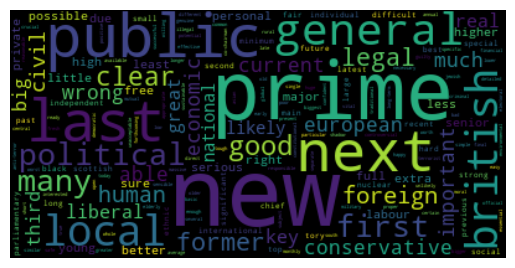

noun


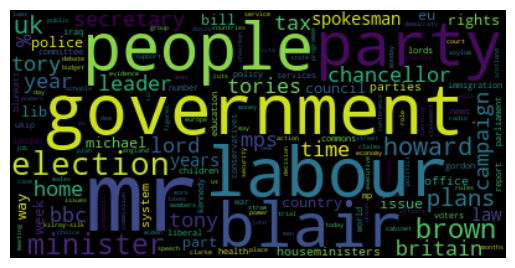

vbz


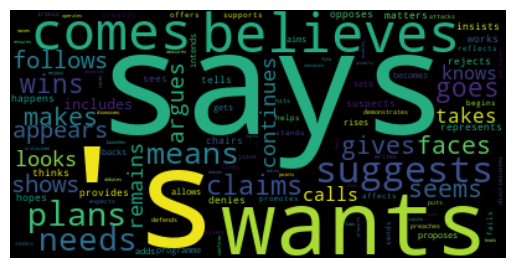

vb


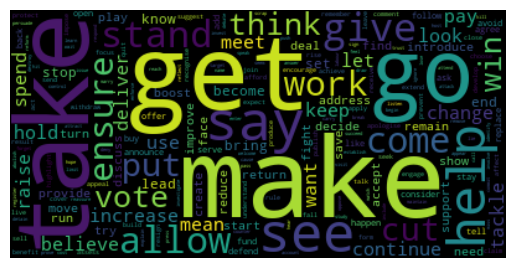

vbn


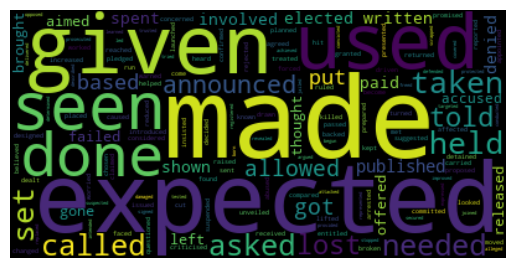

.


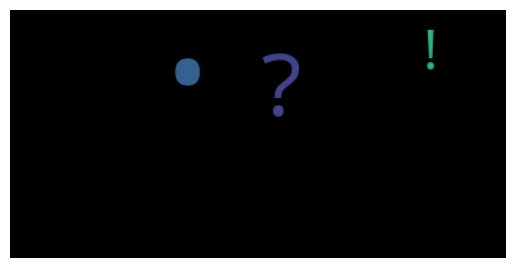

md


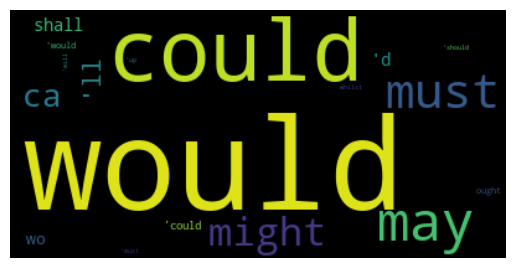

cd


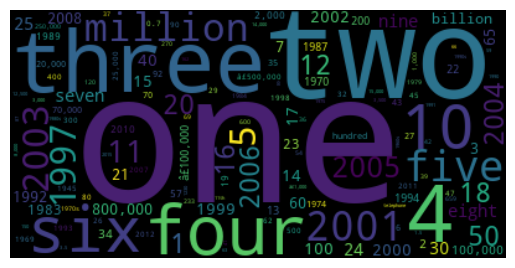

,


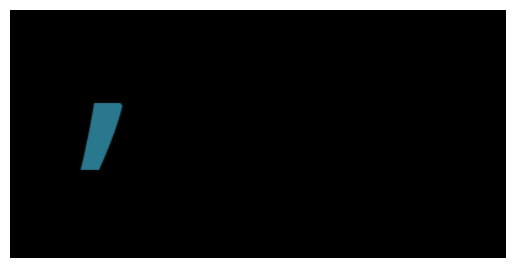

vbd


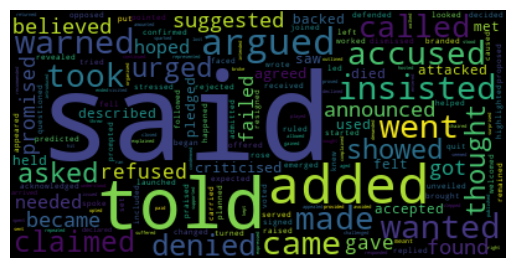

pos


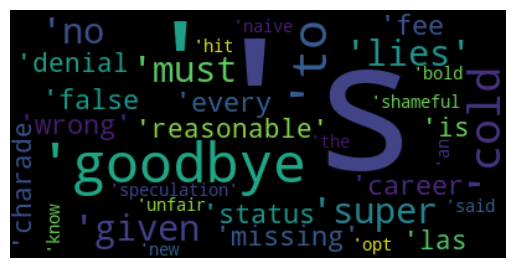

vbp


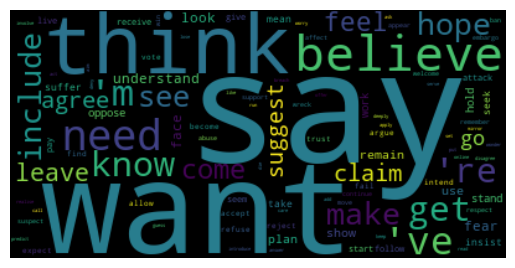

vbg


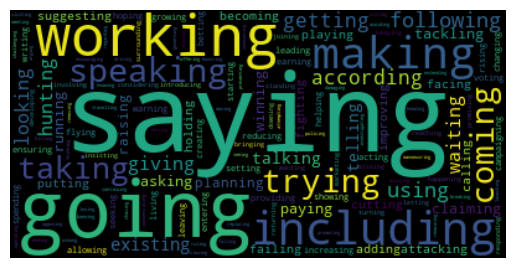

``


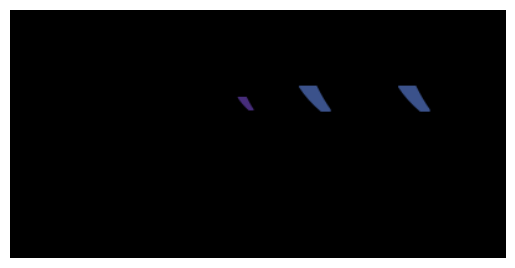

''


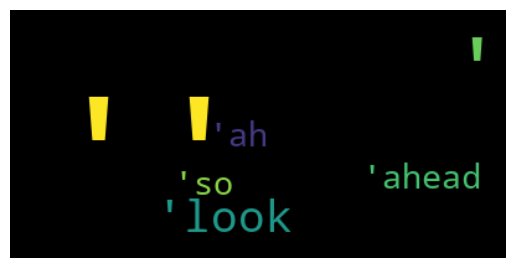

:


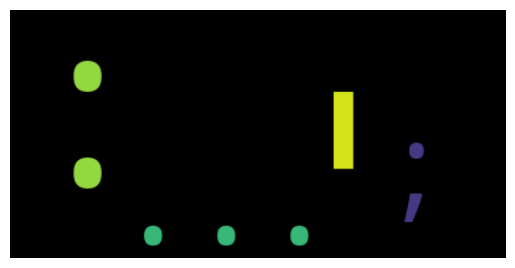

rb


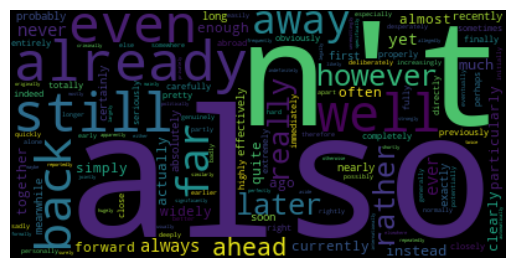

rp


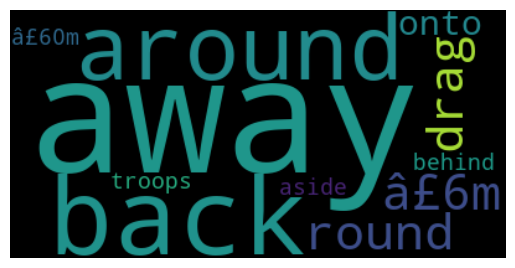

rbr


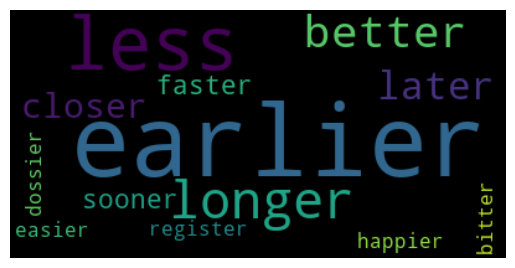

in


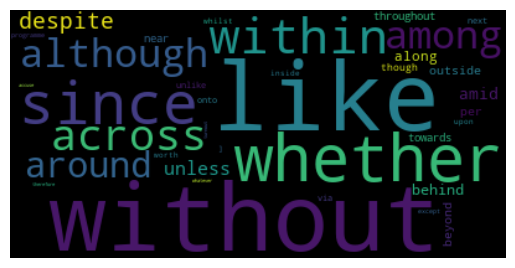

(


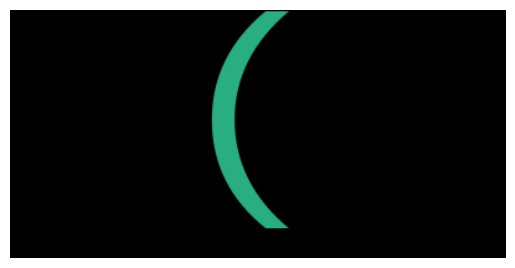

)


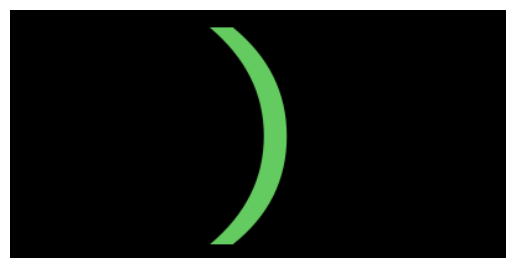

dt


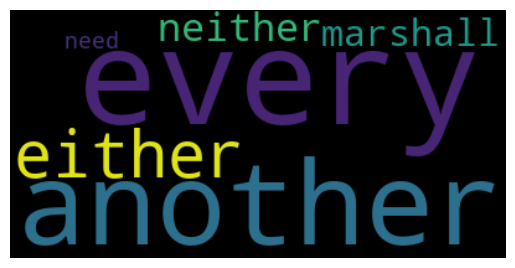

pdt


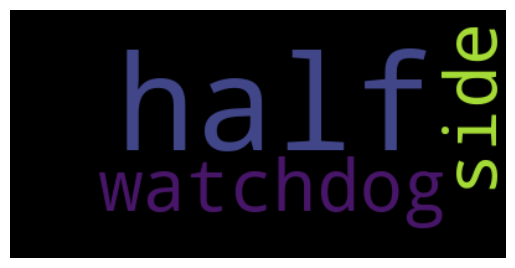

wrb


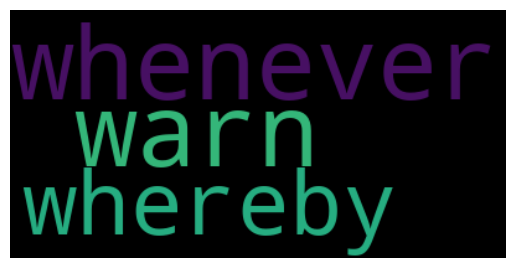

uh


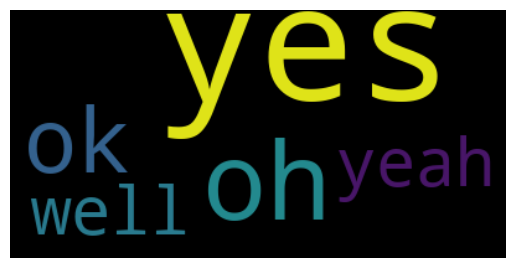

cc


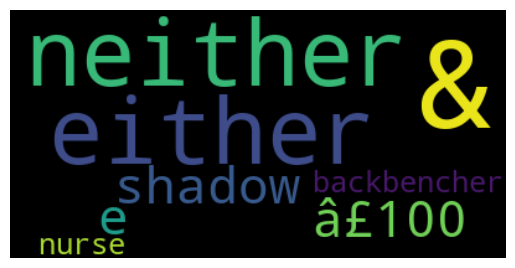

prp


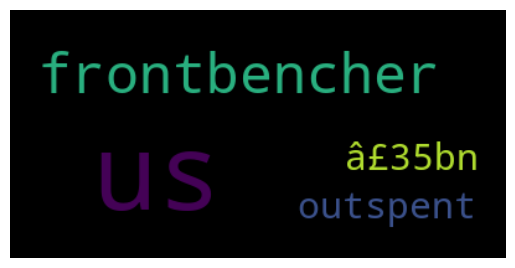

wp$


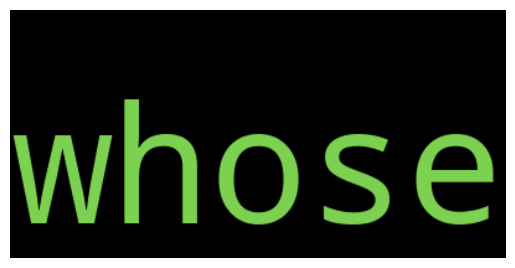

$


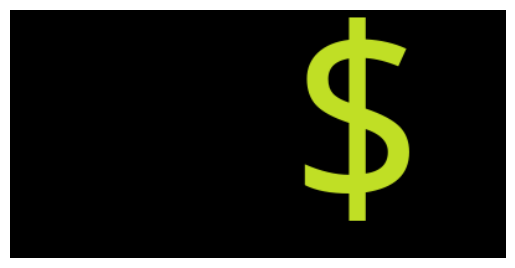

fw


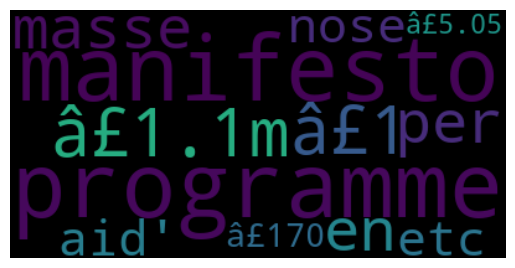

ex


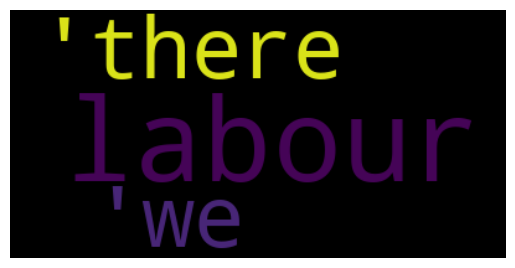

wdt


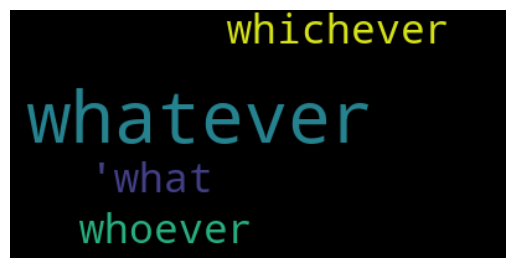

sym


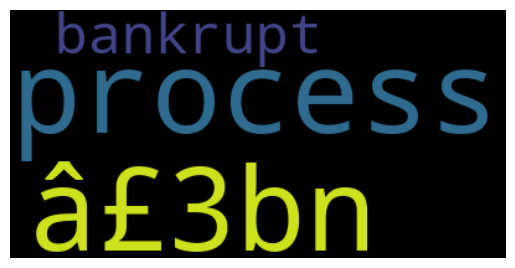

#


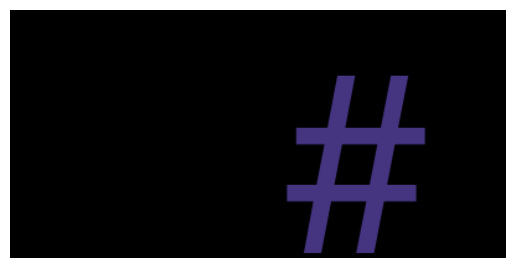

rbs


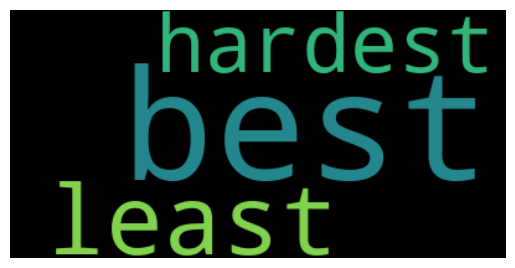

prp$


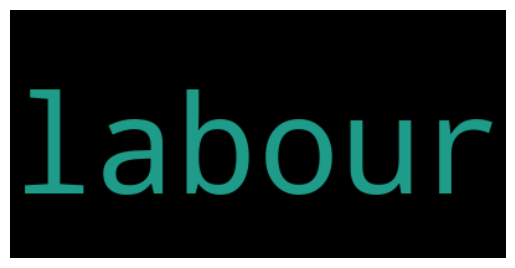

wp


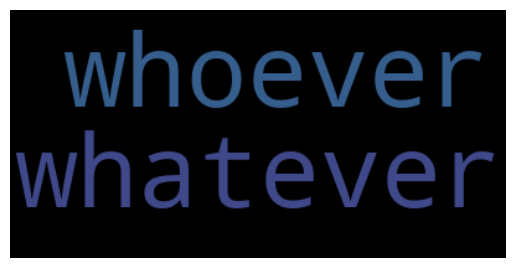

In [14]:
for tag_class, freq in frequencies.items():
    print(tag_class)
    show_wordcloud(freq)

---

### Basic Statistics

- Compute basic statistics such as mean, median, mode, standard deviation, etc., for relevant columns like word count, article length, etc.
- Determine the distribution of article metrics (e.g., length, sentence count, token count, etc.).

In [15]:
columns = [
    'name',
    'length',
    'count_sentences',
    'count_tokens',
]

data = []
for doc in docs:
    row = []
    for column in columns:    
        row.append(doc[column])
    data.append(row)
    
df = pd.DataFrame(data, columns=columns)

print(df.head())

      name  length  count_sentences  count_tokens
0  001.txt    2601               19           514
1  002.txt    2326               19           448
2  003.txt    3109               26           621
3  004.txt    1471               13           278
4  005.txt    2860               24           589


In [16]:
df['length_to_sentences'] = df['length'] / df['count_sentences']
df['length_to_tokens'] = df['length'] / df['count_tokens']
print(df.head())
print()
print(df.describe())
print()
print("df[df.length > 10000]:", len(df[df.length > 10000]))

      name  length  count_sentences  count_tokens  length_to_sentences  \
0  001.txt    2601               19           514           136.894737   
1  002.txt    2326               19           448           122.421053   
2  003.txt    3109               26           621           119.576923   
3  004.txt    1471               13           278           113.153846   
4  005.txt    2860               24           589           119.166667   

   length_to_tokens  
0          5.060311  
1          5.191964  
2          5.006441  
3          5.291367  
4          4.855688  

             length  count_sentences  count_tokens  length_to_sentences  \
count    417.000000       417.000000    417.000000           417.000000   
mean    2685.007194        20.949640    523.100719           130.268216   
std     1715.098505        16.030465    340.837197            15.309990   
min      503.000000         4.000000    101.000000            84.012658   
25%     1879.000000        15.000000    367.000

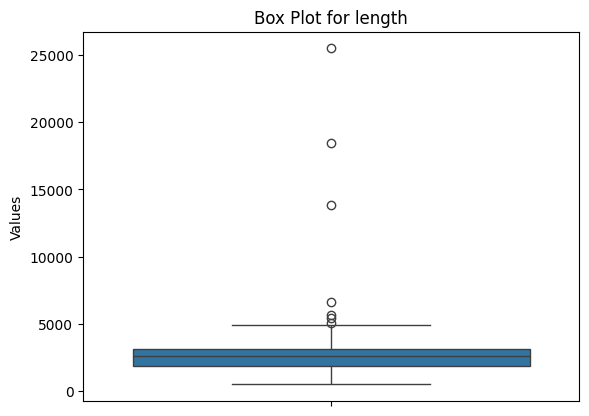

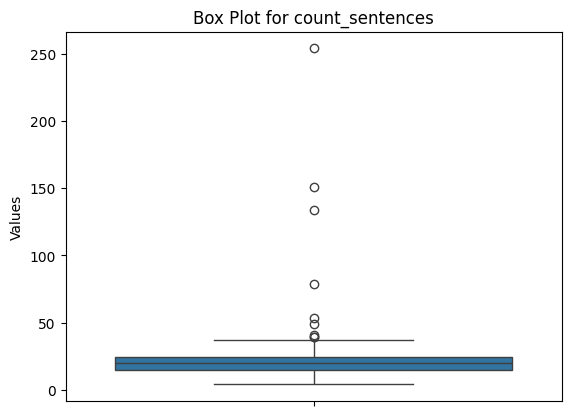

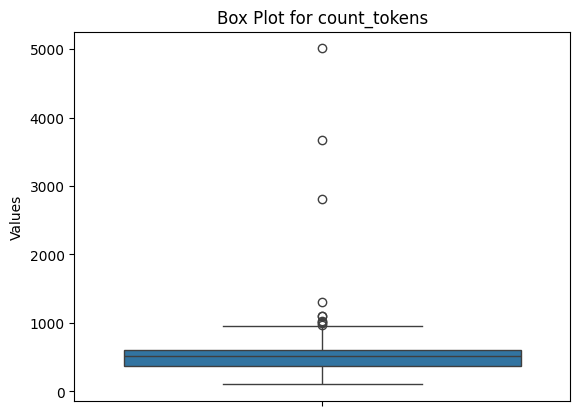

In [21]:
for column in columns[1:]:
    sns.boxplot(data=df[column])
    plt.title('Box Plot for ' + column)
    plt.ylabel('Values')
    plt.show()

In [18]:
# df = df[df.length < 10000]

print("len(df):", len(df))  # 414, 3 removed.
print(df.describe())

len(df): 417
             length  count_sentences  count_tokens  length_to_sentences  \
count    417.000000       417.000000    417.000000           417.000000   
mean    2685.007194        20.949640    523.100719           130.268216   
std     1715.098505        16.030465    340.837197            15.309990   
min      503.000000         4.000000    101.000000            84.012658   
25%     1879.000000        15.000000    367.000000           119.277778   
50%     2629.000000        20.000000    511.000000           129.466667   
75%     3150.000000        24.000000    606.000000           140.416667   
max    25485.000000       254.000000   5012.000000           175.857143   

       length_to_tokens  
count        417.000000  
mean           5.149484  
std            0.207621  
min            4.470738  
25%            5.008949  
50%            5.144949  
75%            5.285106  
max            5.948454  


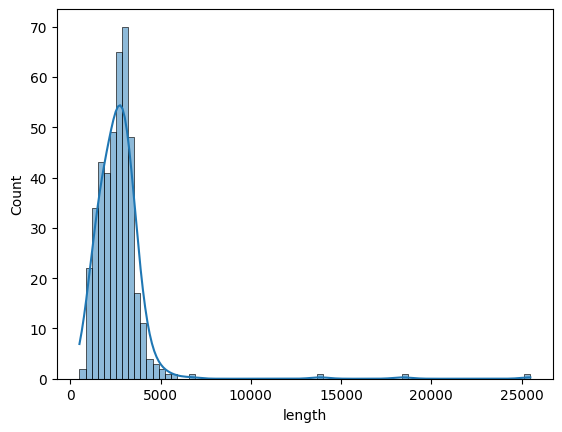

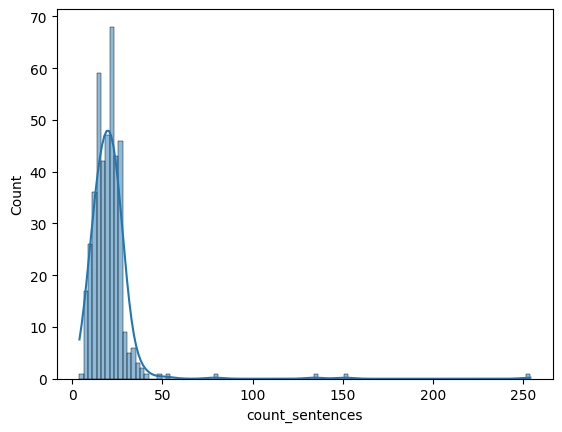

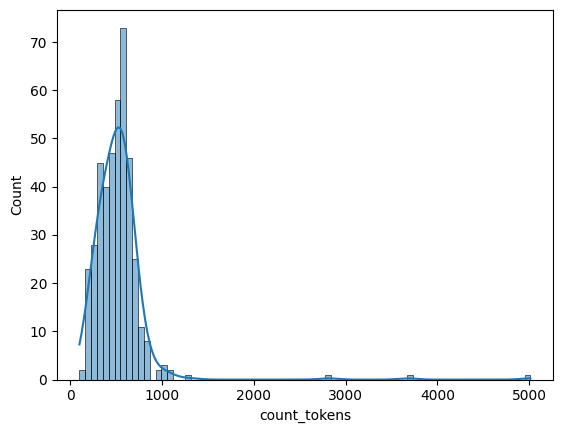

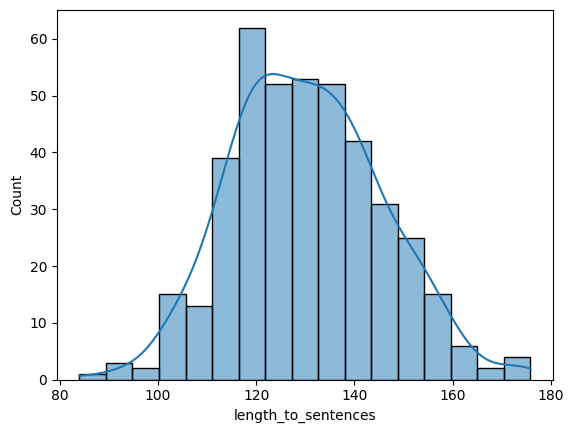

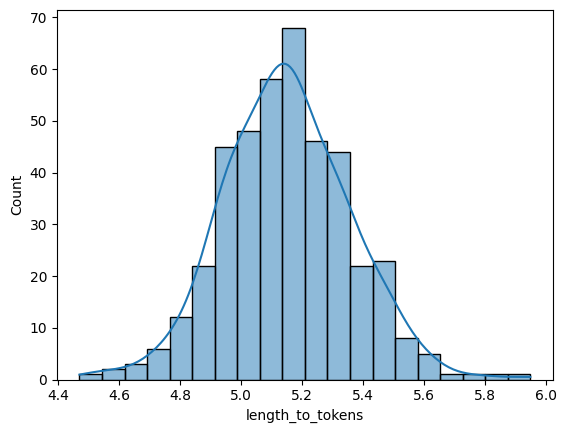

In [23]:
for column in df.columns.tolist()[1:]:  # exclude the first column name from the list, which is 'name'
    values = df[column]
    sns.histplot(values, kde=True)
    plt.show()

In [20]:
df.to_csv("eda.csv", index=False)

---

### Analysis of sentence structure

Analysis of sentence structure without checking POS (part-of-speech) tags individually by utilizing various NLP techniques and tools. Here are a few methods:

1. Dependency Parsing: Dependency parsing is the process of analyzing the grammatical structure of a sentence to determine the relationships between words. Dependency parsers analyze how words in a sentence depend on each other syntactically. You can use libraries like SpaCy or NLTK, which offer dependency parsing functionality.
2. Constituency Parsing: Constituency parsing involves analyzing the sentence to identify its syntactic structure based on constituents (phrases) such as noun phrases, verb phrases, etc. This approach aims to find hierarchical structures within the sentence. Libraries like NLTK provide tools for constituency parsing.
3. Sentence Diagramming: Sentence diagramming is a visual method used to represent the grammatical structure of a sentence. It involves breaking down the sentence into its constituent parts and representing them in a hierarchical manner using diagrams. While not automated, sentence diagramming can help in understanding the structure of a sentence without relying on POS tags.
4. Rule-Based Analysis: You can also perform structural analysis of sentences using rule-based approaches, where you define grammatical rules and patterns to analyze the structure of sentences. This method doesn't necessarily require POS tagging but relies on syntactic rules.
5. Machine Learning Models: You can train machine learning models to perform sentence structure analysis without explicitly checking POS tags. Models such as sequence-to-sequence models or transformers can be trained on annotated data to learn the syntactic structure of sentences.

These methods allow you to analyze the structure of sentences without explicitly checking POS tags individually. Depending on your specific requirements and the complexity of the analysis, you can choose the most suitable approach.